Import needed libraries:

In [1]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE

Import **descriptor_analysis** functions:

In [2]:
import descriptor_analysis as da

The following command gets data from the HDF5 file created by **build_data**:

In [3]:
df, el, unit, dEl, coul, dCell, cell = da.get_data_h5('data.hdf5')

Here:
* **df** hold the pandas dataframe created from the HDF5 file
* **el** holds the elemental descriptor columns
* **unit** holds the unit cell descriptor columns
* **dEl** holds the $\Delta$elemental descriptor columns
* **coul** holds the coluomb matrix descriptor columns
* **dCell** holds the $\Delta$cell descriptor columns 
* **cell** holds the cell descriptor columns

The dataframe looks as follows:

In [4]:
df.head()

,M,CdX,Doping Site,dH(Cd-rich),dH(Mod),dH(X-rich),(+3/+2),(+2/+1),(+1/0),(0/-1),...,Coulomb_54,Coulomb_55,Coulomb_56,Coulomb_57,Coulomb_58,Coulomb_59,Coulomb_60,Coulomb_61,Coulomb_62,Coulomb_63
13,In,CdS,M_Cd,1.375,0.612,0.932,-0.810,-0.482,1.527,2.117,...,5419.372136,1.000000e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5419.372136
25,O,CdS,M_Cd,7.521,6.220,5.564,-0.872,-0.298,0.099,0.467,...,5419.372136,1.000000e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5419.372136
26,S,CdS,M_Cd,6.043,4.731,3.418,-0.799,0.462,0.835,1.325,...,5419.372136,1.481904e+03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5419.372136
27,Se,CdS,M_Cd,5.597,4.296,2.994,-0.770,0.644,1.044,1.527,...,5419.372136,1.000000e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5419.372136
35,V,CdS,M_Cd,1.637,1.850,2.447,-0.291,0.001,1.333,1.984,...,5419.372136,1.000000e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5419.372136


The following command gets data from the csv files provided:

In [5]:
df_2 = da.get_data_csv('CdTe')

This dataframe looks as follows:

In [6]:
df_2.head()

,∆H(Cd-rich),∆H(Mod),∆H(X-rich),(+3/+2),(+2/+1),(+1/0),(0/-1),(-1/-2),(-2/-3),Period,...,Delta EN,Delta At. Num.,Delta Val.,# Cd Neighbors,# X Neighbors,Corrected VBM (eV),Corrected CBM (eV),∆H_uc(Cd-rich),∆H_uc(Mod),∆H_uc(X-rich)
0,1.305,0.838,0.601,-0.851,-0.558,-0.262,0.052,1.775,2.293,2,...,-0.71,-45,-1,0,4,1.171,1.156,1.516,1.048,0.812
1,1.317,1.080,0.989,-0.756,-0.480,-0.187,0.142,1.856,2.316,3,...,-0.76,-37,-1,0,4,1.331,1.316,1.410,1.173,1.083
2,1.892,1.655,1.677,-0.601,-0.277,-0.083,0.253,1.904,2.463,4,...,-0.87,-29,-1,0,4,1.662,1.647,2.179,1.942,1.965
3,2.123,1.886,2.041,-0.552,-0.258,0.024,0.354,1.968,2.422,5,...,-0.87,-11,2,0,4,2.155,2.140,2.563,2.326,2.481
4,2.392,2.155,2.375,-0.453,-0.234,0.103,0.469,1.972,2.514,6,...,-0.90,7,-1,0,4,2.000,2.000,3.000,3.000,3.000


Now that we have some data to work with, we can run some models including:

* Ridge Regression
* Lasso Regression
* Random Forest

In order to do this we will need to have a set of descriptors (X), things we would like to predict (Y), and a data file for the test output. There is also a print option that can be set to true so that the R-squared and RMSE print to the screen. In these example we will use the $\Delta$elemental descriptors to predict the (+3/+2) charge transfer state.

In [7]:
X = df[dEl]
Y = df['(+3/+2)']

data_file = open('descriptor_analysis_example.dat', 'w')

To run lasso regression:

In [8]:
plus_2_lasso_list = da.lasso_reg(X,Y,data_file, p=True)


		Lasso Regression Score with alpha=0.001000: 	0.306895

		RMSE: 		0.402005


To run ridge regression:

In [9]:
plus_2_ridge_list = da.lasso_reg(X,Y,data_file, p=True)


		Lasso Regression Score with alpha=0.001000: 	0.306895

		RMSE: 		0.402005


To run random forest:

In [10]:
plus_2_rf_list = da.rf_reg(X,Y,data_file, p=True)


		Random Forest Regression n=1000: 		0.656986

		RMSE: 		0.282806


We can see that Random Forrest is the most accurate, with the lowest RMSE and highest R-Squared value, so lets look to see how the descriptors were weighted using a bar chart:

[[0.01757887 0.06509793 0.01947892 0.08348214 0.0396209  0.09098795
  0.06714064 0.05495921 0.04923396 0.12632582 0.03895128 0.07635617
  0.00766442 0.00849805 0.02488358 0.01423962 0.00050556 0.1446682
  0.07032677]]


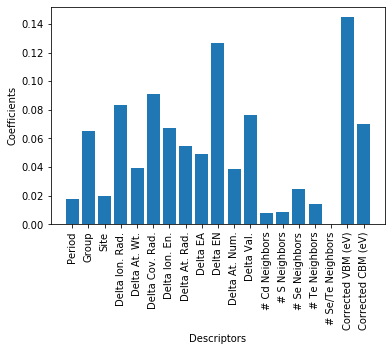

In [11]:
print(plus_2_rf_list)

plt.bar(np.arange(len(plus_2_rf_list[0])), plus_2_rf_list[0])
plt.xticks(np.arange(len(plus_2_rf_list[0])), dEl, rotation=90)
plt.xlabel("Descriptors")
plt.ylabel("Coefficients")
plt.show()

If we just want to look at a smaller set of data from one of the csv files, we can use **do_feature_selection** to run all three types of regression. Here is an example for the CdTe data:

In [12]:
CdTeCoefs = da.do_feature_selection('CdTe',data_file)